In this notebook, let's study how to perform dimensionality reduction using Principal Component Analysis (PCA). Let us revisit the problem defined in Section 14.1 We have a set of points that are clustered closely along the $X_{0} = X_{2}$ plane. Because of random noise, all points don't exactly lie on the plane, but they lie very close to the plane. This means that their variance along the plane is high, and their variance perpendicular to the plane is low. Let's first visualize our data set.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Define helper functions for plotting data

def plot_points(X, title=None):
    fig = plt.figure(figsize=(12, 8), dpi=300)
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2])
    ax.set_xlabel(r'$X_{0}$', fontsize=18)
    ax.set_ylabel(r'$X_{1}$', fontsize=18)
    ax.set_zlabel(r'$X_{2}$', fontsize=18)

    if title is not None:
        ax.set_title(title, fontsize=20)
        
def plot_pc(pc, colors=['r', 'g', 'b'], 
            labels=['First Principal Vector', 'Second Principal Vector', 'Third Principal Vector']):
    fig = plt.figure(figsize=(14, 8), dpi=300)
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel(r'$X_{0}$', fontsize=18)
    ax.set_ylabel(r'$X_{1}$', fontsize=18)
    ax.set_zlabel(r'$X_{2}$', fontsize=18)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)
    for i, color, label in zip(list(range(3)), colors, labels):
            ax.plot([0, 10*pc[0, i]],  
                    [0, 10*pc[1, i]], 
                    [0, 10*pc[2, i]], color=color, label=label)
    ax.legend()

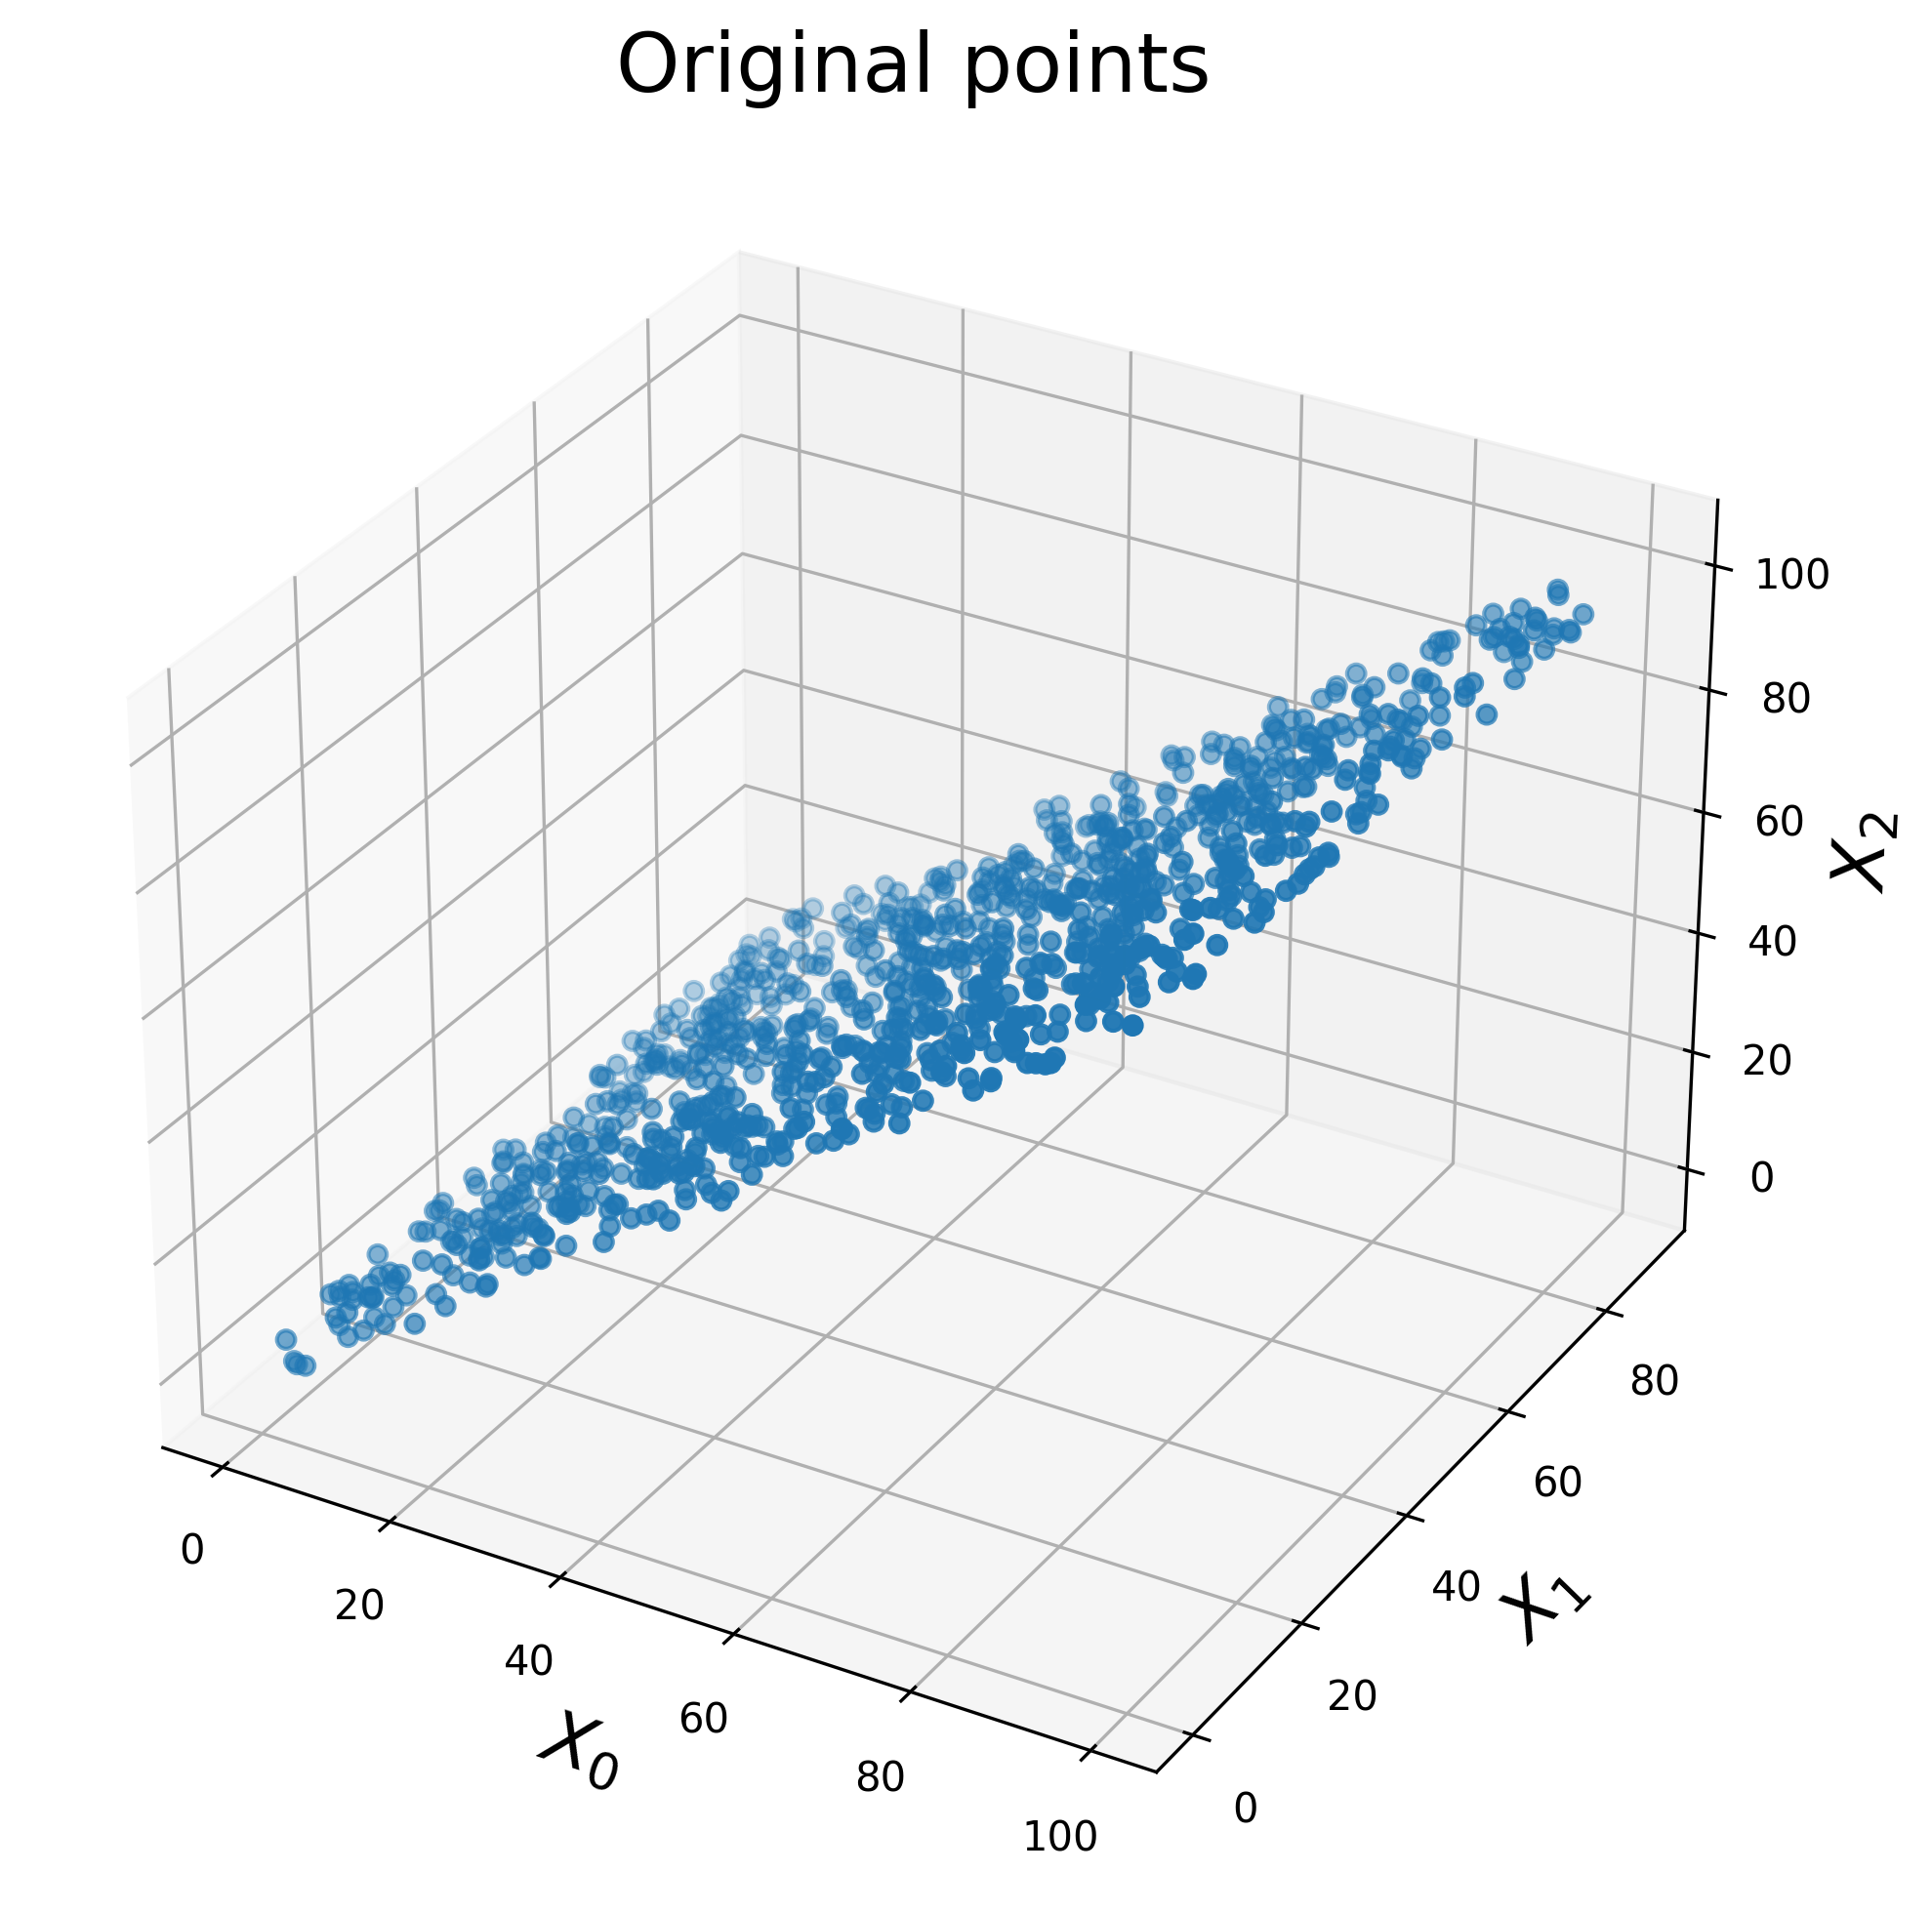

In [3]:
N = 1000
# Create a random data vector
x_0 = np.random.uniform(0, 100, N)

# Create a linear vector with mean = 50 + random noise
x_1 = np.random.uniform(0, 90, N)

# Create a highly correlated linear vector with random noise
# x_2 =  50 +  np.random.choice([-5, 5], N)
x_2 =  x_0 +  np.random.choice([-3, 3], N)

# Create data matrix with x_0, x_1 as columns.
X = np.column_stack((x_0, x_1, x_2))

# We always substract the mean before performing SVD. Here, we are storing the mean so
# that we can reconstruct the original data points
X_mean = X.mean(axis=0)

plot_points(X, title='Original points')

Since the variance perpendicular to the $X_{0} = X_{2}$ plane is very low, the information along this dimension is low and it can be dropped altogether to obtain a more compact (dimensionality-reduced) representation of the data. Let's do this using Singular Value Decomposition (SVD).

In [4]:
# Mean center the data
X = X - X_mean

# Run SVD
U, S, Vh = np.linalg.svd(X, full_matrices=False)

# The columns of V are the principal vectors
V = Vh.T

# Remove the last principal vector - This is along the direction of least variance (perpendicular to X0 = X2 plane)
V_trimmed =  V[:, 0: 2]

# Project the input data points into the lower dimensional space
X_proj = np.matmul(X, V_trimmed)

Now, let's try to reconstruct the original points from the projected points. Note that we will not be able to fully reconstruct the original points because we have lost information during dimensionality reduction. However, we should be able to approximately reconstruct the original points since we have lost very little information.

In [5]:
# Pad X_proj with zeros to make it a nxd matrix - needed for matrix multiplication
X_proj = np.append(X_proj, np.zeros((X_proj.shape[0], 1)), axis=1)

# Post multiply with Vh (V transpose) to project it back to the original space
X_recon = np.matmul(X_proj, Vh)

# Add the mean
X_recon = X_recon + X_mean

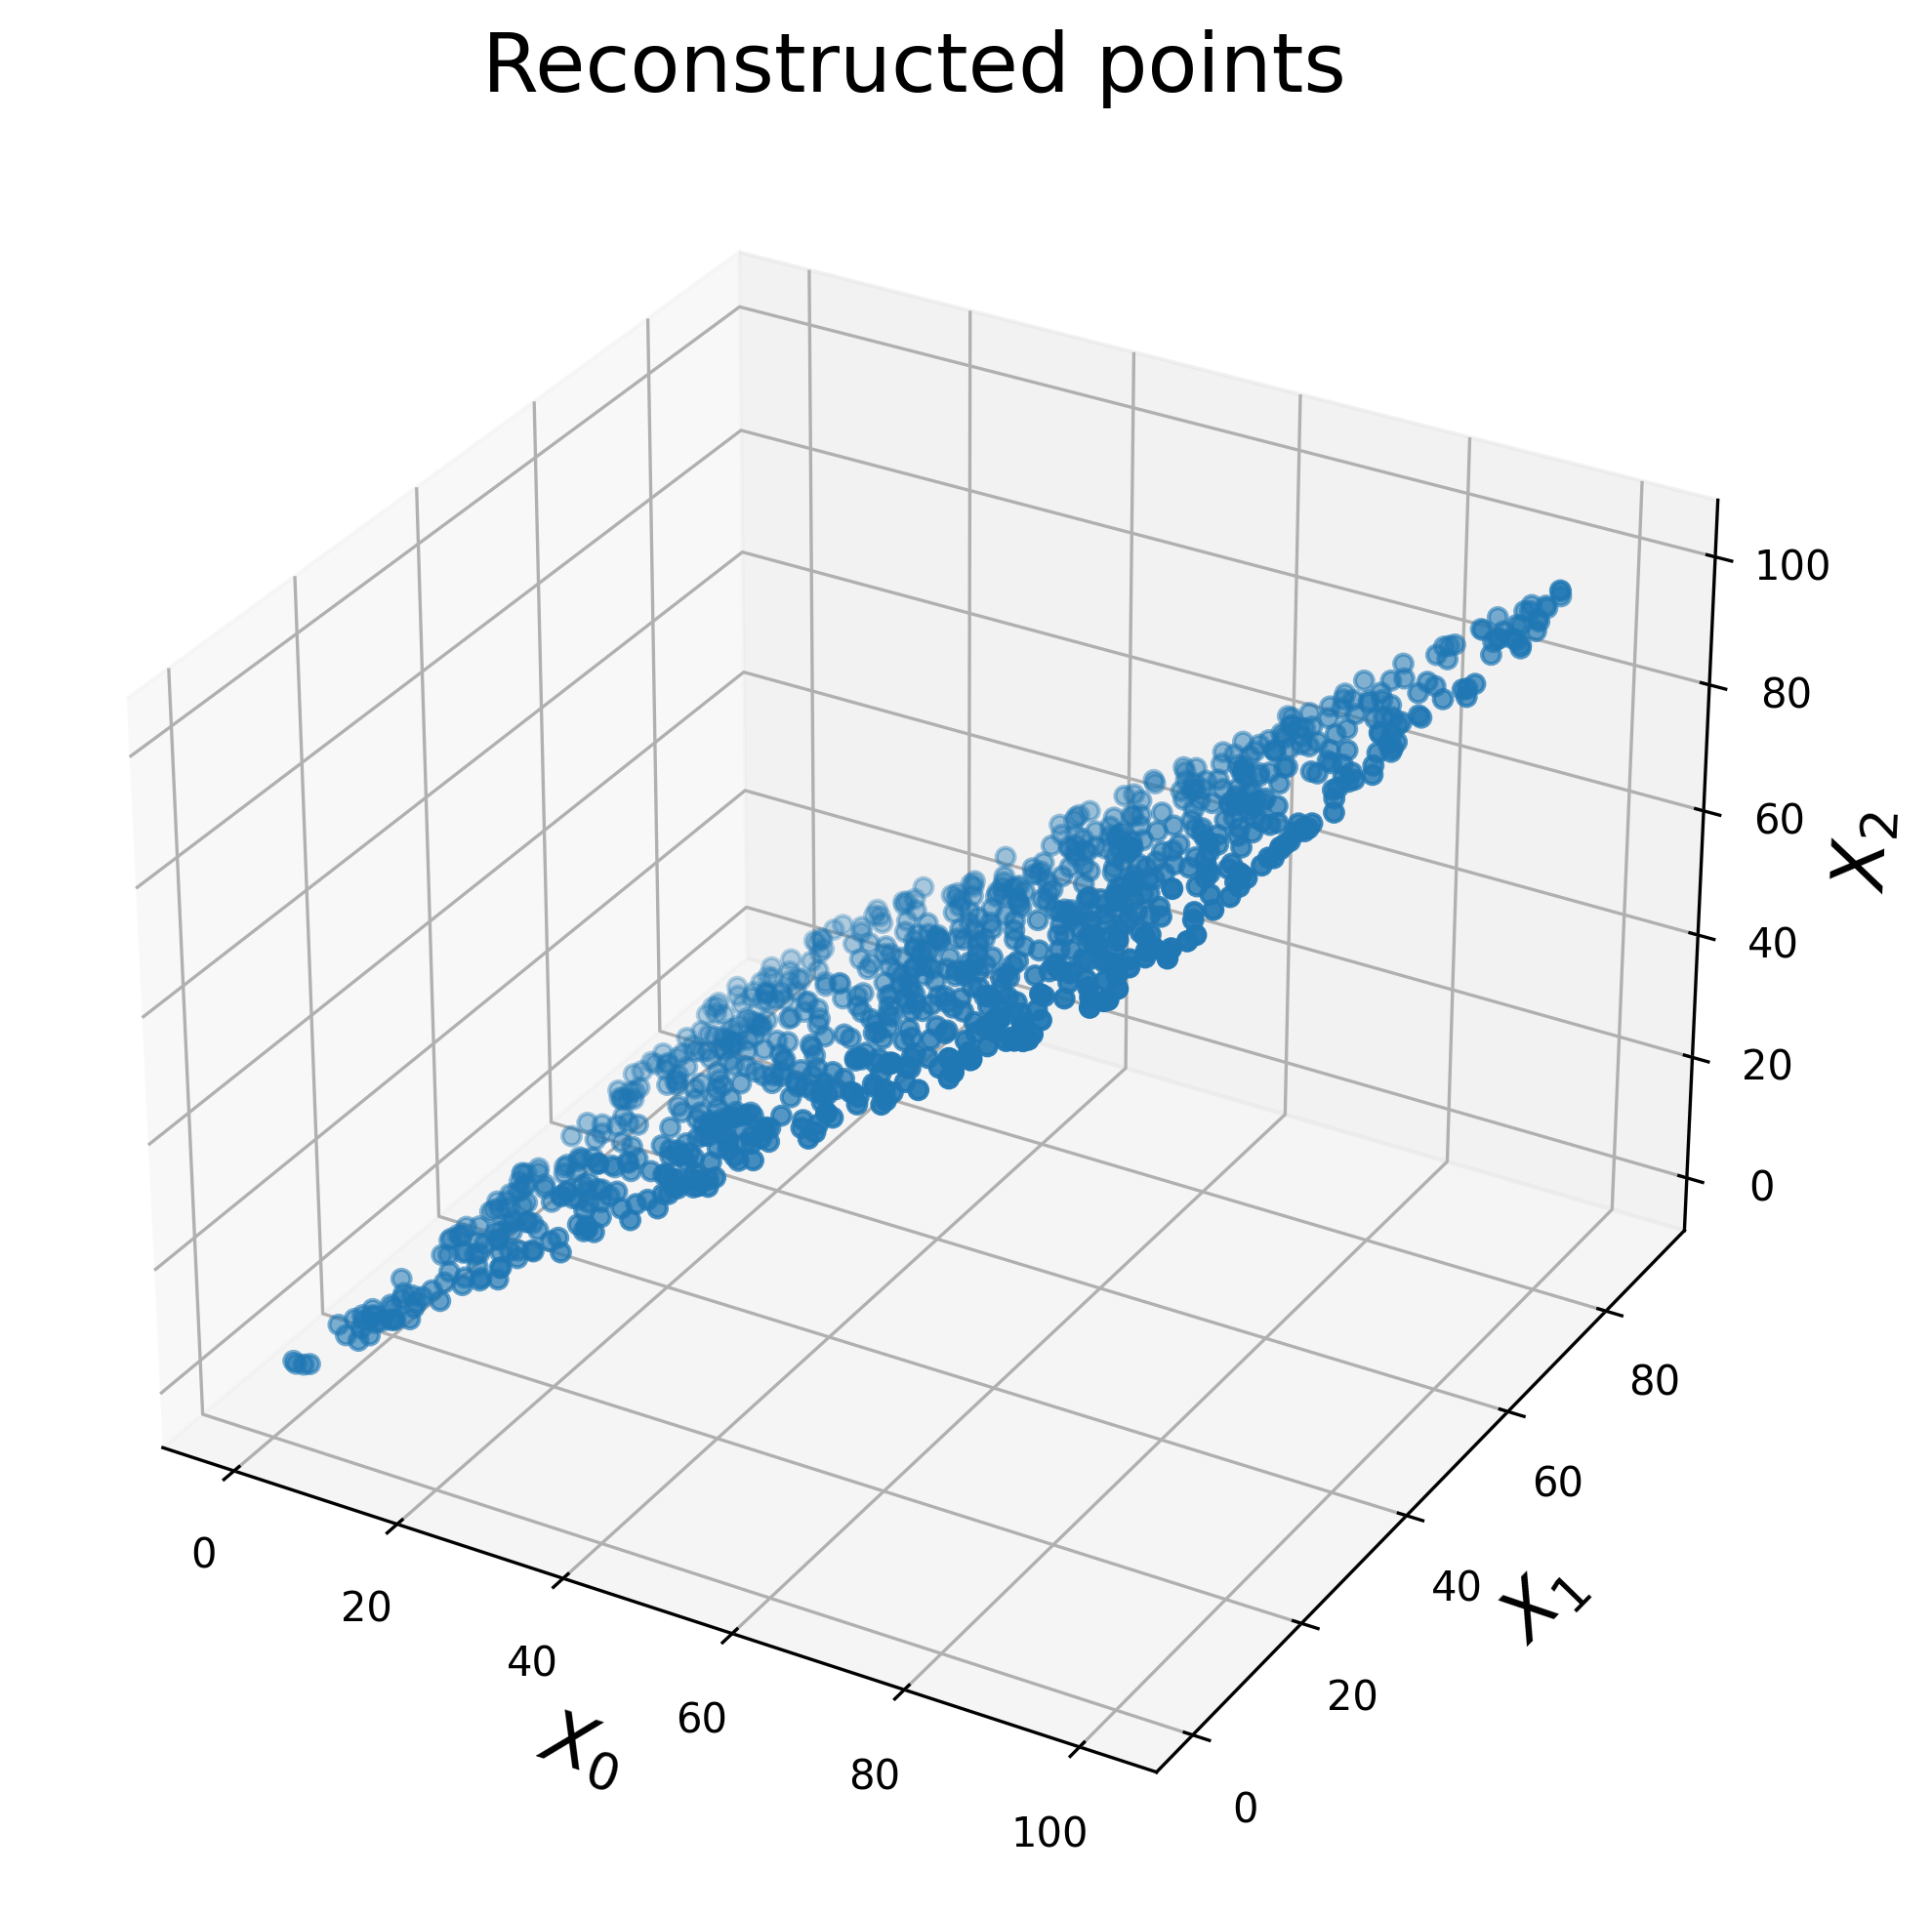

In [6]:
plot_points(X_recon, title='Reconstructed points')

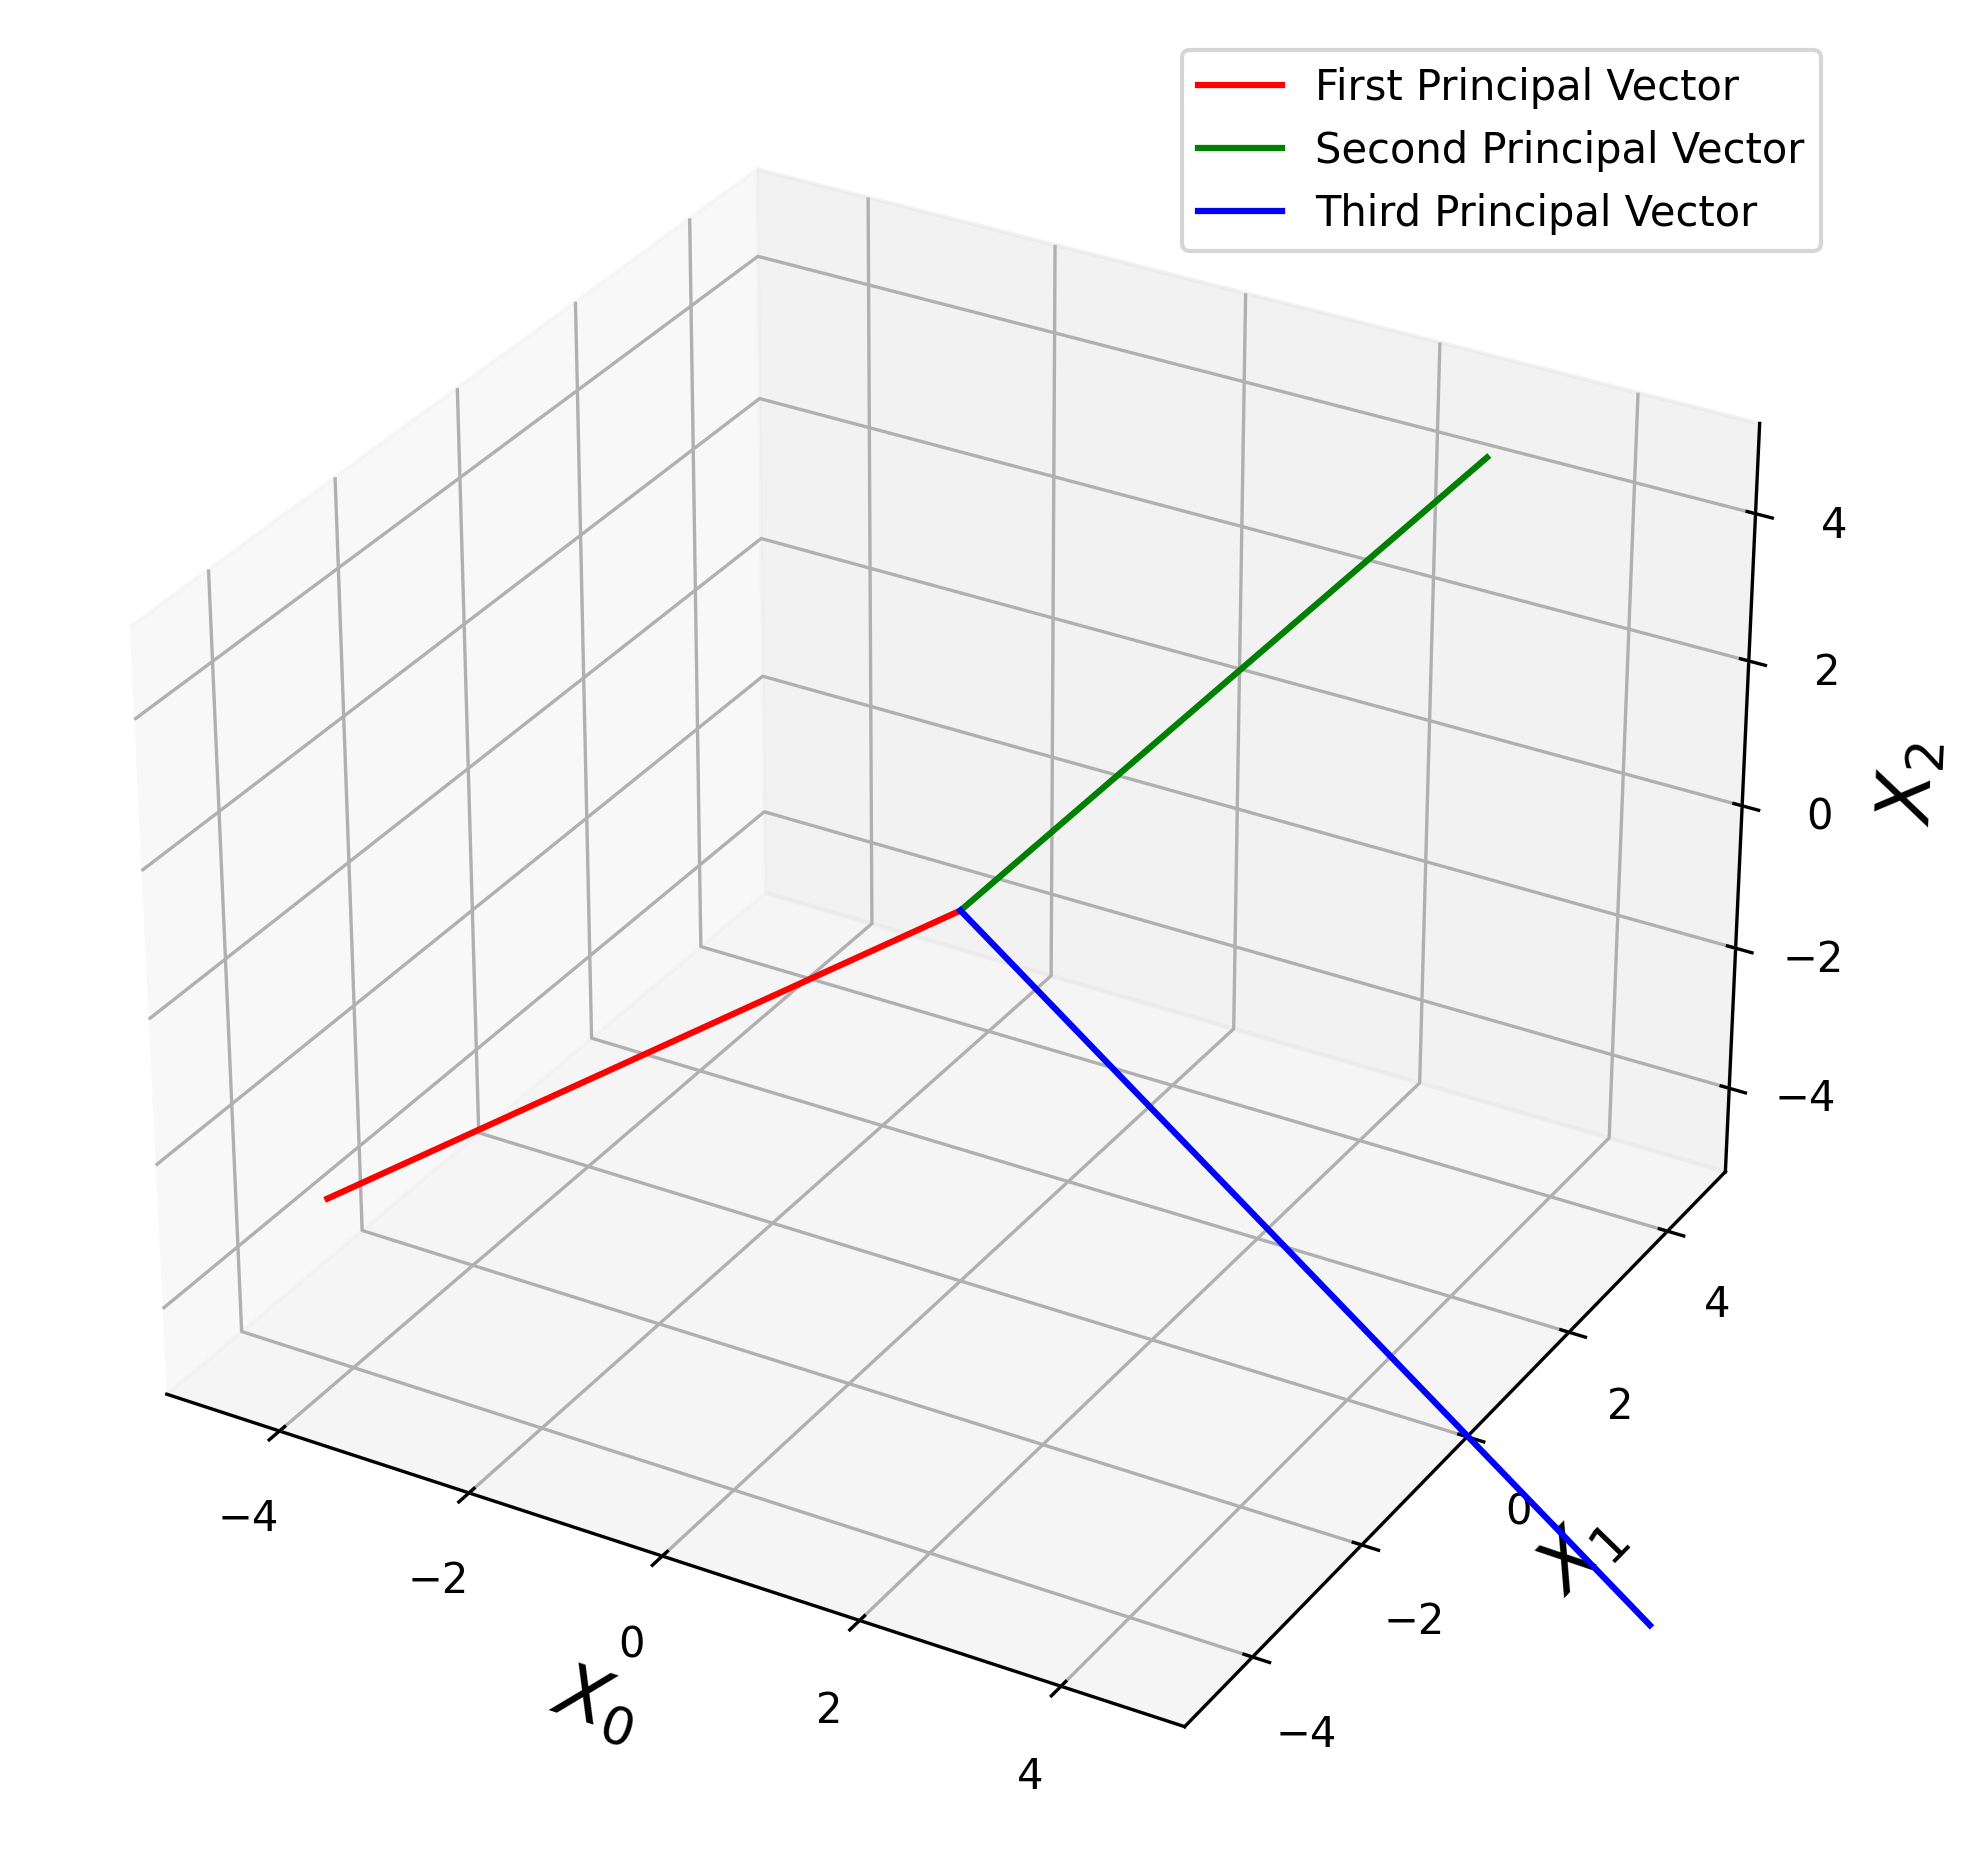

In [7]:
plot_pc(pc=V)